# Malaria EDA

### Load in packages and data

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
malaria_df = pd.read_csv('cleared_malaria_data.csv')

## Summary Statistics of Malaria Dataset

In [99]:
malaria_df["Malaria_count"].describe()

count    8.880000e+02
mean     1.795985e+06
std      4.132241e+06
min      0.000000e+00
25%      8.020000e+02
50%      3.452600e+04
75%      1.607987e+06
max      2.963018e+07
Name: Malaria_count, dtype: float64

In [101]:
malaria_df.nunique()

SpatialDimValueCode    102
Country                102
Year                     9
Malaria_count          790
dtype: int64

In [103]:
malaria_df.isnull().sum()

SpatialDimValueCode    0
Country                0
Year                   0
Malaria_count          0
dtype: int64

## Trend of annual case counts of malaria over time (2015-2023)

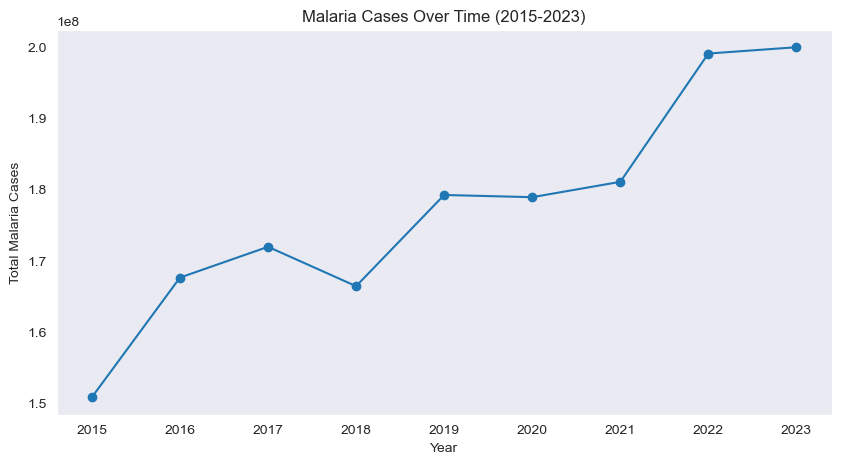

In [105]:
malaria_by_year = malaria_df.groupby("Year")["Malaria_count"].sum()

# plot for trend of malaria case counts from 2015-2023
plt.figure(figsize=(10,5))
plt.plot(malaria_by_year.index, malaria_by_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Malaria Cases")
plt.title("Malaria Cases Over Time (2015-2023)")
plt.grid()
plt.show()

## Top 10 countries with the highest total counts of malaria cases between 2015-2023

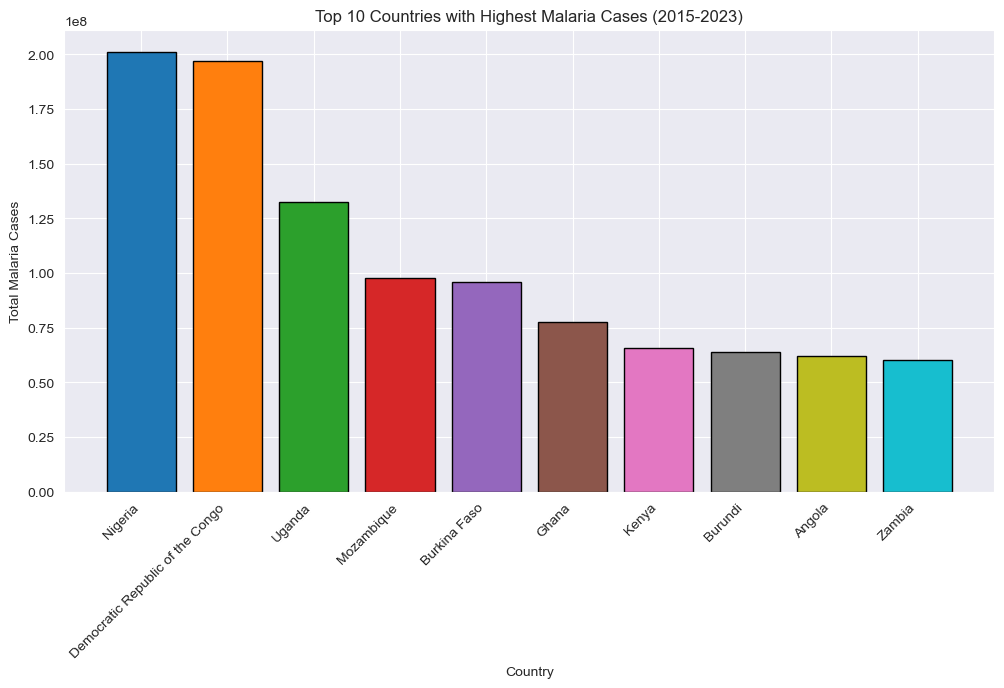

In [116]:

sns.set_style("darkgrid")

# group cases by the top 10 countries
top_countries = malaria_df.groupby("Country")["Malaria_count"].sum().nlargest(10)

# Bar chart for country level comparison of malaria counts between 2015-2023
colors = sns.color_palette("tab10", len(top_countries))
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
bars = plt.bar(top_countries.index, top_countries.values, color=colors, edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Total Malaria Cases")
plt.title("Top 10 Countries with Highest Malaria Cases (2015-2023)")
plt.xticks(rotation=45, ha="right")
plt.show()

## Heatmap to show where malaria is

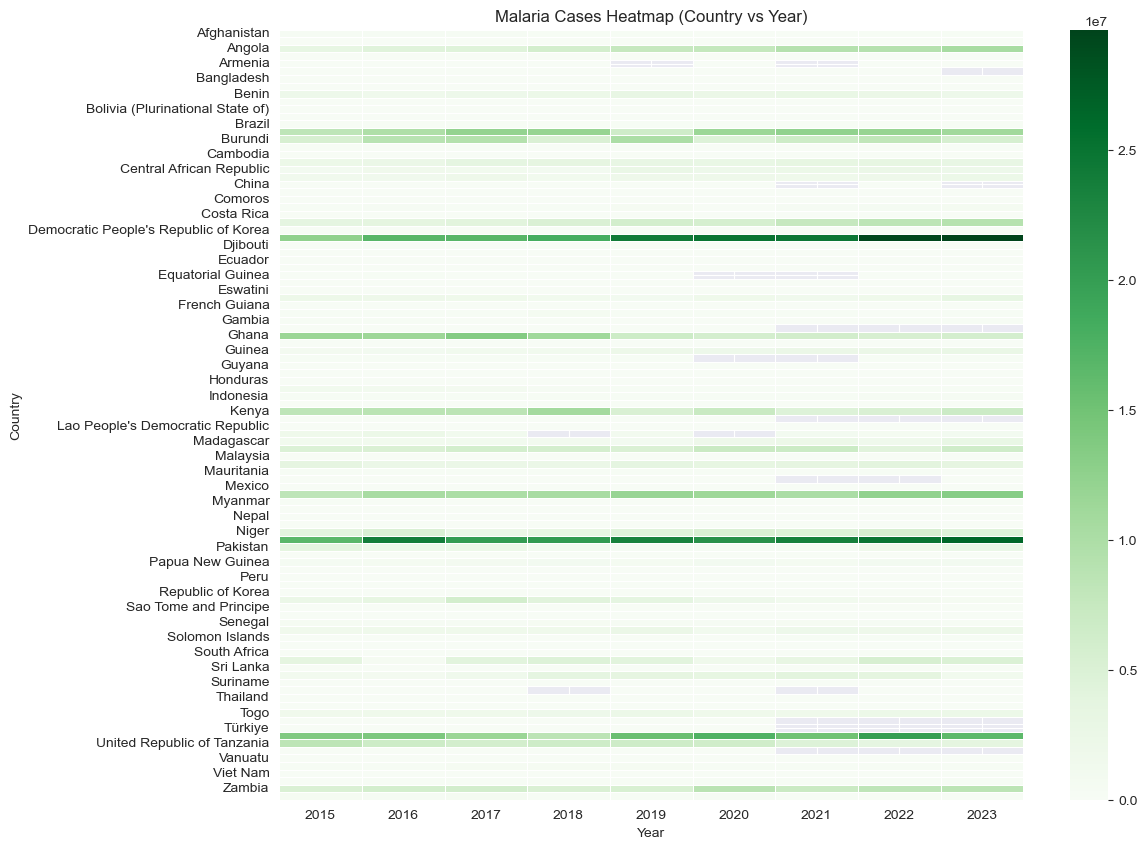

In [109]:
# Pivot data for heatmap
heatmap_data = malaria_df.pivot_table(index="Country", columns="Year", values="Malaria_count", aggfunc="sum")

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap="Greens", linewidths=0.5)
plt.title("Malaria Cases Heatmap (Country vs Year)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()